1. In this notebook, I've used `polars` library to load and mainuplate the datasets.
2. I am following **"Credit Risk Modeling Course - CampusX"** to perform EDA.

In [2]:
import polars as pl

# Import dataset (one-by-one)

**🙅 Not Recommended**

In [2]:
# WARNING: Import merged dataset in parquet format (if exists)
# because importing excel file is ``very slow``
bank_data = pl.read_excel("data/bank_data.xlsx")
cibil_data = pl.read_excel(
    "data/cibil_data.xlsx",
    engine="openpyxl",
    # read_options={"ignore_errors": True,},  # while using `xlsx2csv` library
)

In [3]:
bank_data.head()

PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,5,4,1,0,0,0.0,0.0,0.2,0.8,0,0,0.0,0.0,0,0,0,0,1,0,4,1,4,0,72,18
2,1,0,1,0,0,0.0,0.0,1.0,0.0,1,0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,7,7
3,8,0,8,1,0,0.125,0.0,1.0,0.0,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
4,1,0,1,1,0,1.0,0.0,1.0,0.0,1,0,1.0,0.0,1,0,0,0,0,0,0,0,1,1,5,5
5,3,2,1,0,0,0.0,0.0,0.333,0.667,0,0,0.0,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [4]:
cibil_data.head()

PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str
1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,"""Married""","""12TH""",48,"""M""",51000,114,0.2,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,"""PL""","""PL""",696,"""P2"""
2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,"""Single""","""GRADUATE""",23,"""F""",19000,50,1.0,0.0,0.37,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,0.86,0,0,"""ConsumerLoan""","""ConsumerLoan""",685,"""P2"""
3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,"""Married""","""SSC""",40,"""M""",18,191,1.0,0.5,0.585,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,5741.667,1,0,"""ConsumerLoan""","""others""",693,"""P2"""
4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,"""Married""","""SSC""",34,"""M""",10000,246,1.0,1.0,0.99,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,9.9,0,0,"""others""","""others""",673,"""P2"""
5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,"""Married""","""POST-GRADUATE""",48,"""M""",15000,75,0.333,0.0,0.0,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,-99999.0,0,0,"""AL""","""AL""",753,"""P1"""


## Join Dataset

In [5]:
# Infer common columns
[i for i in cibil_data.columns if i in bank_data.columns]

['PROSPECTID']

In [3]:
df = bank_data.join(cibil_data, on="PROSPECTID")
print(df.shape)
df.head()

(51336, 87)


PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,…,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str
1,5,4,1,0,0,0.0,0.0,0.2,0.8,0,0,0.0,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,…,0,29,6,0,0,0,6,0,0,566,0,0,0,"""Married""","""12TH""",48,"""M""",51000,114,0.2,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,"""PL""","""PL""",696,"""P2"""
2,1,0,1,0,0,0.0,0.0,1.0,0.0,1,0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,…,0,0,1,0,0,0,0,0,0,209,1,0,0,"""Single""","""GRADUATE""",23,"""F""",19000,50,1.0,0.0,0.37,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,0.86,0,0,"""ConsumerLoan""","""ConsumerLoan""",685,"""P2"""
3,8,0,8,1,0,0.125,0.0,1.0,0.0,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,…,0,25,4,0,0,0,0,0,0,587,0,0,0,"""Married""","""SSC""",40,"""M""",18,191,1.0,0.5,0.585,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,5741.667,1,0,"""ConsumerLoan""","""others""",693,"""P2"""
4,1,0,1,1,0,1.0,0.0,1.0,0.0,1,0,1.0,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,…,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,"""Married""","""SSC""",34,"""M""",10000,246,1.0,1.0,0.99,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,9.9,0,0,"""others""","""others""",673,"""P2"""
5,3,2,1,0,0,0.0,0.0,0.333,0.667,0,0,0.0,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,…,0,0,1,0,0,0,0,0,0,3951,0,0,0,"""Married""","""POST-GRADUATE""",48,"""M""",15000,75,0.333,0.0,0.0,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,-99999.0,0,0,"""AL""","""AL""",753,"""P1"""


In [4]:
# Export merged dataset as parquet for future use
# df.write_parquet("data/credit-modeling.parquet")

# Import merged dataset

**🙋 Recommended Processs**

In [3]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from polars import selectors as cs
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway as oneway_anova
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pl.read_parquet("data/credit-modeling.parquet")
print(df.shape)
df.head()

(51336, 87)


PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,…,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,str,str,i64,str
1,5,4,1,0,0,0.0,0.0,0.2,0.8,0,0,0.0,0.0,0,0,0,0,1,0,4,1,4,0,72,18,549,35,15,11,29,29,0,0,0,-99999,-99999,…,0,29,6,0,0,0,6,0,0,566,0,0,0,"""Married""","""12TH""",48,"""M""",51000,114,0.2,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,"""PL""","""PL""",696,"""P2"""
2,1,0,1,0,0,0.0,0.0,1.0,0.0,1,0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,7,7,47,-99999,-99999,0,-99999,0,0,0,0,0,0,…,0,0,1,0,0,0,0,0,0,209,1,0,0,"""Single""","""GRADUATE""",23,"""F""",19000,50,1.0,0.0,0.37,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,0.86,0,0,"""ConsumerLoan""","""ConsumerLoan""",685,"""P2"""
3,8,0,8,1,0,0.125,0.0,1.0,0.0,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2,302,11,3,9,25,25,1,9,8,25,25,…,0,25,4,0,0,0,0,0,0,587,0,0,0,"""Married""","""SSC""",40,"""M""",18,191,1.0,0.5,0.585,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,5741.667,1,0,"""ConsumerLoan""","""others""",693,"""P2"""
4,1,0,1,1,0,1.0,0.0,1.0,0.0,1,0,1.0,0.0,1,0,0,0,0,0,0,0,1,1,5,5,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,…,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,"""Married""","""SSC""",34,"""M""",10000,246,1.0,1.0,0.99,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,9.9,0,0,"""others""","""others""",673,"""P2"""
5,3,2,1,0,0,0.0,0.0,0.333,0.667,0,0,0.0,0.0,0,1,0,0,0,0,0,3,0,2,131,32,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,…,0,0,1,0,0,0,0,0,0,3951,0,0,0,"""Married""","""POST-GRADUATE""",48,"""M""",15000,75,0.333,0.0,0.0,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,-99999.0,0,0,"""AL""","""AL""",753,"""P1"""


# Preprocessing

In [5]:
# segregate cols of dataset
target_col = "Approved_Flag"
cat_cols = df.select(cs.string().exclude(target_col)).columns
num_cols = df.select(cs.numeric().exclude(target_col, "PROSPECTID")).columns

print(f"{target_col = }", end="\n\n")
print(f"{len(cat_cols)} {cat_cols = }", end="\n\n")
print(f"{len(num_cols)} {num_cols = }", end="\n\n")

target_col = 'Approved_Flag'

5 cat_cols = ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

80 num_cols = ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'time_since_first_deliquency', 'time_since_recent_deliquency', 'num_times_delinquent', 'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 

In [6]:
# Any which is not selected as cat_cols or num_cols
[i for i in df.columns if i not in cat_cols + num_cols]

['PROSPECTID', 'Approved_Flag']

## NULL Values

In [7]:
# Convert all -99999 value to None (null/nan)
df = df.with_columns(
    [
        pl.when(pl.col(name).eq(-99999))
        .then(pl.lit(None))
        .otherwise(pl.col(name))
        .alias(name)
        for name in num_cols
    ]
)

In [8]:
null_count = (
    df.lazy()
    .select(
        [pl.col(col).is_null().sum() for col in num_cols],
    )
    .melt()
    .filter(
        pl.col("value").ne(0),
    )
    .sort("value", descending=True)
)
null_count.collect()

variable,value
str,u32
"""CC_utilization…",47636
"""PL_utilization…",44435
"""time_since_fir…",35949
"""time_since_rec…",35949
"""max_delinquenc…",35949
…,…
"""enq_L3m""",6321
"""time_since_rec…",4291
"""pct_currentBal…",72


In [9]:
# null count over 10K
null_count_over_10k = (
    null_count.filter(
        pl.col("value").ge(10_000),
    )
    .collect()
    .get_column("variable")
    .to_list()
)
null_count_over_10k

['CC_utilization',
 'PL_utilization',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_unsec_exposure_inPct',
 'max_deliq_6mts',
 'max_deliq_12mts']

### Drop columns containing many null values

In [10]:
df = df.drop(null_count_over_10k)
df.shape

(51336, 79)

In [11]:
# Remove dropped cols from num_cols list
[num_cols.remove(i) for i in null_count_over_10k]
print(num_cols)

['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m', 'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_

In [12]:
(
    df.select(
        [
            pl.col(col).is_null().sum()
            for col in num_cols
            if col not in null_count_over_10k
        ],
    )
    .melt()
    .filter(
        pl.col("value").ne(0),
    )
    .sort("value", descending=True)
)

variable,value
str,u32
"""tot_enq""",6321
"""CC_enq""",6321
"""CC_enq_L6m""",6321
"""CC_enq_L12m""",6321
"""PL_enq""",6321
…,…
"""enq_L3m""",6321
"""time_since_rec…",4291
"""pct_currentBal…",72


## Unique values in `num_cols`

In [36]:
df.select([pl.n_unique(i) for i in num_cols]).melt(
    variable_name="columns", value_name="n_unique"
).sort("n_unique", descending=True)

columns,n_unique
str,u32
"""time_since_rec…",2435
"""time_since_rec…",2382
"""pct_currentBal…",1529
"""NETMONTHLYINCO…",1316
"""Time_With_Curr…",490
…,…
"""num_dbt_6mts""",6
"""CC_Flag""",2
"""PL_Flag""",2


## Unique values in `cat_cols`

In [13]:
for col in cat_cols:
    print(f"{col:>15} - {df.get_column(col).unique().to_list()}")

  MARITALSTATUS - ['Married', 'Single']
      EDUCATION - ['UNDER GRADUATE', 'OTHERS', 'SSC', 'GRADUATE', 'POST-GRADUATE', '12TH', 'PROFESSIONAL']
         GENDER - ['F', 'M']
 last_prod_enq2 - ['ConsumerLoan', 'AL', 'CC', 'PL', 'others', 'HL']
first_prod_enq2 - ['CC', 'PL', 'others', 'AL', 'ConsumerLoan', 'HL']


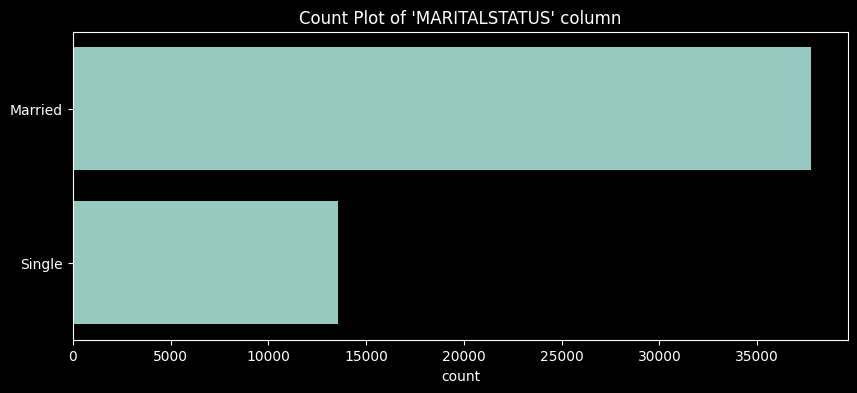

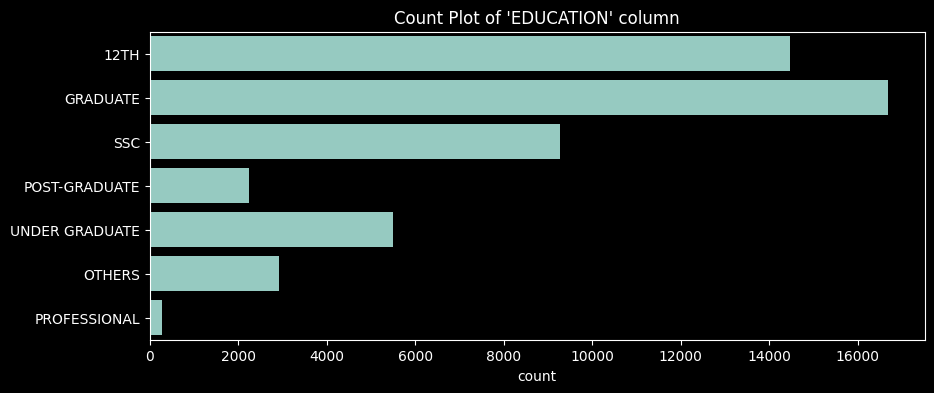

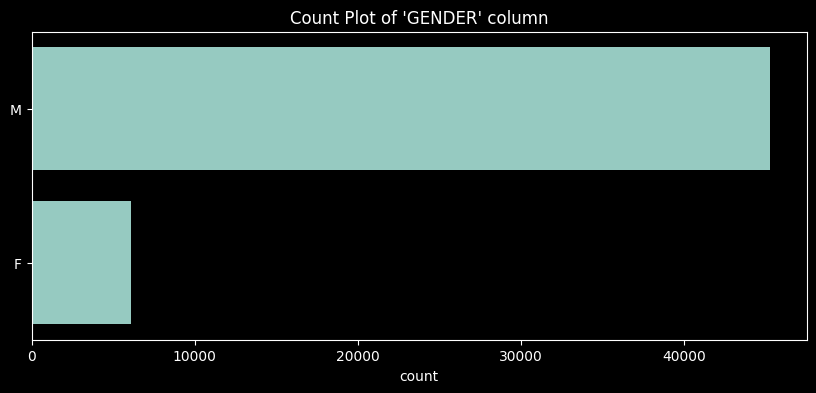

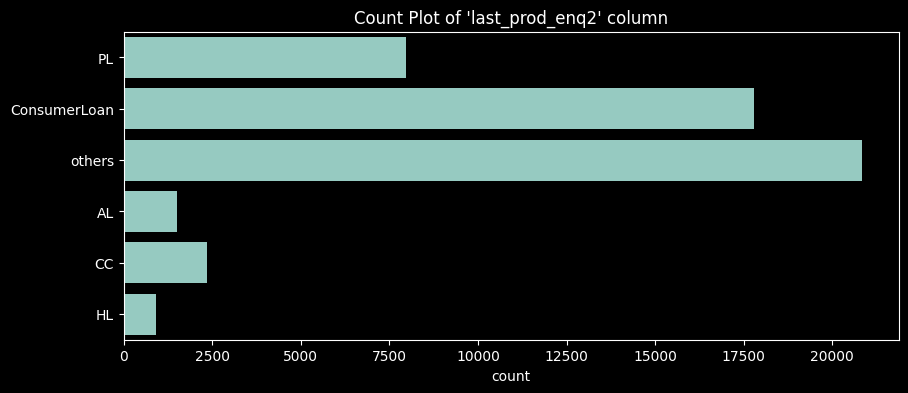

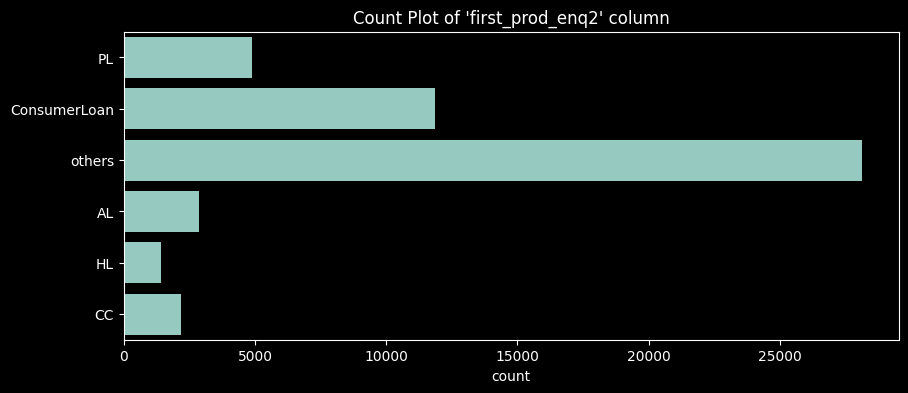

In [ ]:
# Plot unique values count with bar plot
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(df.get_column(col).to_numpy())
    plt.title(f"Count Plot of {col!r} column")
    plt.show()

## VIF of Numerical Columns

**❓ QUESTION**

1. Does VIF affected by Normalisation?
2. What if I remove previous columns; will it affect the VIF if the previous columns exists? (Sir had mentioned this in the trail session)

In [ ]:
# Generally threshold value for VIF is 5 (you can choose on your domain knowledge)
VIF_THRESHOLD = 5

In [ ]:
# If we doesn't drop the high VIF columns on-the-spot then all the high coorelated
# columns had the high VIF.
for col in num_cols:
    the_vif = variance_inflation_factor(df[num_cols].drop_nulls(), num_cols.index(col))
    if the_vif > VIF_THRESHOLD:
        print(f"{col:>25} - {the_vif}")

/Users/iarv/Developer/notebooks/credit-modeling/.venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Total_TL - inf
            Tot_Closed_TL - inf
            Tot_Active_TL - inf
      Total_TL_opened_L6M - 8.386094184170567
        Tot_TL_closed_L6M - 6.822916488054288
          pct_tl_open_L6M - 5.344199901464039
            pct_active_tl - inf
            pct_closed_tl - 1788.95771490895
     Total_TL_opened_L12M - 15.200137933469819
       Tot_TL_closed_L12M - 9.044617706396677
                  Auto_TL - inf
                    CC_TL - inf
              Consumer_TL - inf
                  Gold_TL - inf
                  Home_TL - inf
                    PL_TL - inf
               Secured_TL - inf
             Unsecured_TL - inf
                 Other_TL - inf
     num_times_delinquent - 6.96131446746582
           num_deliq_6mts - inf
          num_deliq_12mts - inf
        num_deliq_6_12mts - inf
        num_times_30p_dpd - 12.754547497478903
        num_times_60p_dpd - 7.664123029753517
                  num_std - 6.319428106041929
             num_std_6mts - 

In [ ]:
num_cols

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [ ]:
# num_cols.index("HL_Flag")
num_cols[69:]

['HL_Flag', 'GL_Flag', 'Credit_Score']

In [ ]:
# In this process I am excluding all the previous columns whose VIF is calculated
for col in num_cols[:-1]:
    curr_col_index = num_cols.index(col)
    the_vif = variance_inflation_factor(
        df.select(num_cols[curr_col_index:]).drop_nulls(),
        0,
    )
    if the_vif > VIF_THRESHOLD:
        print(f"{col:>25} - {the_vif}")

                 Total_TL - inf
            Tot_Closed_TL - inf
            Tot_Active_TL - 11.320180023968081
      Total_TL_opened_L6M - 8.363698035000327
        Tot_TL_closed_L6M - 6.520647877790933
          pct_tl_open_L6M - 5.14950161821264
            pct_active_tl - inf
            pct_closed_tl - 1788.1379270380778
     Total_TL_opened_L12M - 8.574183995580643
                  Auto_TL - inf
              Consumer_TL - 19.428642906643795
                  Gold_TL - 29.467804467370065
     num_times_delinquent - 7.707632559040148
max_recent_level_of_deliq - 5.300604965473001
           num_deliq_6mts - inf
          num_deliq_12mts - 7.3323259990811485
        num_times_30p_dpd - 6.9386984900648
                  num_std - 6.140804394322846
             num_std_6mts - 15.068322401777072
             num_dbt_6mts - 7.1087934663877554
             num_lss_6mts - 6.429191127318508
                  tot_enq - 13.245115388557519
               CC_enq_L6m - 8.826890621448827
       

In the second approach, very less number of columns have show high VIF value compare to first approach.

## Chi-Square (cat/target)

In [14]:
df.pivot(
    values="EDUCATION",
    index="EDUCATION",
    columns=target_col,
    aggregate_function="len",
)

EDUCATION,P2,P1,P3,P4
str,u32,u32,u32,u32
"""12TH""",9347,1430,2196,1494
"""GRADUATE""",10086,1994,2433,2160
"""SSC""",6014,982,1305,975
"""POST-GRADUATE""",1353,348,289,252
"""UNDER GRADUATE…",3361,616,809,706
"""OTHERS""",1878,381,379,279
"""PROFESSIONAL""",160,52,41,16


In [ ]:
CHI2_PVALUE_THRESHOLD = 0.05

In [15]:
for col in cat_cols[:-1]:
    _, pval, _, _ = chi2_contingency(
        df.pivot(  # works as ``pd.crosstab`` function
            values=col,
            index=target_col,
            columns=col,
            aggregate_function="len",
        ).drop(target_col),
    )
    # cat_cols are less so we don't filter them with threshold
    print(f"p_value of {col} : {pval}")

p_value of MARITALSTATUS : 2.7588304433709322e-257
p_value of EDUCATION : 8.464676085080213e-38
p_value of GENDER : 0.00024506679895417094
p_value of last_prod_enq2 : 0.0


All the categorical columns have very low `pvalue` _(less than 0.05)_ so, we don't drop any `cat_cols`.

## ANOVA (num/target)

In [26]:
ANOVA_PVALUE_THRESHOLD = 0.05

In [37]:
for col in num_cols:
    grouped_data = (
        df.lazy()
        .select(col, target_col)
        .drop_nulls()
        .group_by(target_col)
        .agg(col)
        .sort(target_col)
        .collect()
    )
    _, p_value = oneway_anova(*[g[1] for g in grouped_data.iter_rows()])
    if p_value > ANOVA_PVALUE_THRESHOLD:
        print(f"{col:>18} - {p_value}")

      num_sub_6mts - 0.0758316430790429
      num_dbt_6mts - 0.05196339061523531
      num_lss_6mts - 0.588775550367156
     num_lss_12mts - 0.3651521309345726
pct_currentBal_all_TL - 0.5820733859304024


## Drop Columns

Those columns who fails in VIF, Chi-Square and ANOVA test.

In [39]:
# Considering the second approach in VIF test
failed_at_vif = {
    "Total_TL",
    "Tot_Closed_TL",
    "Tot_Active_TL",
    "Total_TL_opened_L6M",
    "Tot_TL_closed_L6M",
    "pct_tl_open_L6M",
    "pct_active_tl",
    "pct_closed_tl",
    "Total_TL_opened_L12M",
    "Auto_TL",
    "Consumer_TL",
    "Gold_TL",
    "num_times_delinquent",
    "max_recent_level_of_deliq",
    "num_deliq_6mts",
    "num_deliq_12mts",
    "num_times_30p_dpd",
    "num_std",
    "num_std_6mts",
    "num_dbt_6mts",
    "num_lss_6mts",
    "tot_enq",
    "CC_enq_L6m",
    "PL_enq",
    "PL_enq_L6m",
    "enq_L12m",
    "enq_L6m",
    "AGE",
    "pct_PL_enq_L6m_of_L12m",
    "pct_CC_enq_L6m_of_L12m",
}

failed_at_chi2 = set()

failed_at_anova = {
    "num_sub_6mts",
    "num_dbt_6mts",
    "num_lss_6mts",
    "num_lss_12mts",
    "pct_currentBal_all_TL",
}

In [40]:
cols_to_drop = failed_at_vif | failed_at_chi2 | failed_at_anova
cols_to_drop

{'AGE',
 'Auto_TL',
 'CC_enq_L6m',
 'Consumer_TL',
 'Gold_TL',
 'PL_enq',
 'PL_enq_L6m',
 'Tot_Active_TL',
 'Tot_Closed_TL',
 'Tot_TL_closed_L6M',
 'Total_TL',
 'Total_TL_opened_L12M',
 'Total_TL_opened_L6M',
 'enq_L12m',
 'enq_L6m',
 'max_recent_level_of_deliq',
 'num_dbt_6mts',
 'num_deliq_12mts',
 'num_deliq_6mts',
 'num_lss_12mts',
 'num_lss_6mts',
 'num_std',
 'num_std_6mts',
 'num_sub_6mts',
 'num_times_30p_dpd',
 'num_times_delinquent',
 'pct_CC_enq_L6m_of_L12m',
 'pct_PL_enq_L6m_of_L12m',
 'pct_active_tl',
 'pct_closed_tl',
 'pct_currentBal_all_TL',
 'pct_tl_open_L6M',
 'tot_enq'}

In [43]:
# These may a powerful column for model
dropping_exception_cols = {
    "AGE",
    "Gold_TL",
    "tot_enq",
}

In [45]:
cols_to_drop = cols_to_drop - dropping_exception_cols
cols_to_drop

{'Auto_TL',
 'CC_enq_L6m',
 'Consumer_TL',
 'PL_enq',
 'PL_enq_L6m',
 'Tot_Active_TL',
 'Tot_Closed_TL',
 'Tot_TL_closed_L6M',
 'Total_TL',
 'Total_TL_opened_L12M',
 'Total_TL_opened_L6M',
 'enq_L12m',
 'enq_L6m',
 'max_recent_level_of_deliq',
 'num_dbt_6mts',
 'num_deliq_12mts',
 'num_deliq_6mts',
 'num_lss_12mts',
 'num_lss_6mts',
 'num_std',
 'num_std_6mts',
 'num_sub_6mts',
 'num_times_30p_dpd',
 'num_times_delinquent',
 'pct_CC_enq_L6m_of_L12m',
 'pct_PL_enq_L6m_of_L12m',
 'pct_active_tl',
 'pct_closed_tl',
 'pct_currentBal_all_TL',
 'pct_tl_open_L6M'}

In [47]:
# Finally drop with (exception columns)
df = df.drop(cols_to_drop)
print(df.shape)
df.head()

(51336, 49)


PROSPECTID,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
i64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,f64,f64,i64,i64,f64,f64,i64,i64,str,str,i64,str
1,0.0,0,0.0,0.0,0,0,1,0,4,1,4,0,72,18,549,0,0,11,0,0,0,0,0,29,6,0,0,0,566,0,"""Married""","""12TH""",48,"""M""",51000,114,0.2,0.0,0,1,0.0,0.0,1,0,"""PL""","""PL""",696,"""P2"""
2,0.0,0,1.0,0.0,0,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,1,0,0,0,209,0,"""Single""","""GRADUATE""",23,"""F""",19000,50,1.0,0.0,0,0,0.0,0.0,0,0,"""ConsumerLoan""","""ConsumerLoan""",685,"""P2"""
3,0.0,0,0.25,0.0,1,0,1,0,0,2,6,0,47,2,302,8,0,10,0,0,0,0,0,25,4,0,0,0,587,0,"""Married""","""SSC""",40,"""M""",18,191,1.0,0.5,0,0,0.0,0.0,1,0,"""ConsumerLoan""","""others""",693,"""P2"""
4,0.0,0,1.0,0.0,1,0,0,0,0,0,1,1,5,5,null,0,0,5,0,0,0,0,0,0,null,null,null,null,null,null,"""Married""","""SSC""",34,"""M""",10000,246,1.0,1.0,0,0,0.0,0.0,0,0,"""others""","""others""",673,"""P2"""
5,0.0,0,0.0,0.0,0,0,0,0,0,3,0,2,131,32,583,0,0,16,0,0,0,0,0,0,1,0,0,0,3951,0,"""Married""","""POST-GRADUATE""",48,"""M""",15000,75,0.333,0.0,0,0,0.0,0.0,0,0,"""AL""","""AL""",753,"""P1"""


# Export preprocessed dataset

In [48]:
df.write_parquet("preprocessed_data.parquet")